In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the dataset
file_path = 'Electric_Vehicle_Population_Data.csv'
vehicle_df= pd.read_csv(file_path)

In [3]:
vehicle_df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4RJXN66R,Snohomish,Everett,WA,98204.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,21.0,261311557,POINT (-122.2507211 47.8976713),PUGET SOUND ENERGY INC,5.306104e+10
1,KNDJX3AEXG,King,Renton,WA,98058.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950.0,11.0,210641315,POINT (-122.1476337 47.4438471),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJ3E1EA3L,King,Seattle,WA,98125.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,46.0,124517347,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1G1RC6S5XH,Kitsap,Port Orchard,WA,98367.0,2017,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53.0,0.0,26.0,7832933,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
4,5UXTA6C09P,Snohomish,Monroe,WA,98272.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,39.0,235249262,POINT (-121.968385 47.854897),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194227,5YJYGDEE1M,Franklin,Pasco,WA,99301.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,9.0,179707937,POINT (-119.1429639 46.2546529),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF F...,5.302102e+10
194228,5YJ3E1EA7P,Clallam,Sequim,WA,98382.0,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,24.0,241584416,POINT (-123.1090862 48.0805816),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.300900e+10
194229,5YJ3E1EB6P,Snohomish,Everett,WA,98208.0,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,38.0,249701056,POINT (-122.2032349 47.8956271),PUGET SOUND ENERGY INC,5.306104e+10
194230,5YJ3E1EA5K,King,Issaquah,WA,98029.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,5.0,106197619,POINT (-122.0209893 47.5632565),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [4]:
#  data types
data_types =vehicle_df.dtypes
print("\nData Types:")
print(data_types)


Data Types:
VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                       float64
Base MSRP                                            float64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census

In [5]:
# basic statistics
basic_stats =vehicle_df.describe(include='all')
print("Basic Statistics:")
print(basic_stats)

Basic Statistics:
        VIN (1-10)  County     City   State    Postal Code     Model Year  \
count       194232  194223   194223  194232  194223.000000  194232.000000   
unique       11695     198      756      46            NaN            NaN   
top     7SAYGDEE6P    King  Seattle      WA            NaN            NaN   
freq          1224  100061    31797  193800            NaN            NaN   
mean           NaN     NaN      NaN     NaN   98175.800678    2020.781807   
std            NaN     NaN      NaN     NaN    2435.345863       2.999041   
min            NaN     NaN      NaN     NaN    1731.000000    1997.000000   
25%            NaN     NaN      NaN     NaN   98052.000000    2019.000000   
50%            NaN     NaN      NaN     NaN   98125.000000    2022.000000   
75%            NaN     NaN      NaN     NaN   98372.000000    2023.000000   
max            NaN     NaN      NaN     NaN   99577.000000    2025.000000   

          Make    Model           Electric Vehicle Type  

# Data cleaning

In [6]:
# removing unnecessary columns

columns_to_remove = ['VIN (1-10)', 'State', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility', '2020 Census Tract']
vehicle_df =vehicle_df.drop(columns=columns_to_remove)

In [7]:
#  missing values
missing_values = vehicle_df.isnull().sum()
print("Missing values before cleaning:")
print(missing_values)

Missing values before cleaning:
County                                                 9
City                                                   9
Postal Code                                            9
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         2
Base MSRP                                              2
Legislative District                                 432
dtype: int64


In [8]:
vehicle_df = vehicle_df.dropna(subset=['County', 'City', 'Postal Code'])
vehicle_df['Electric Range'].fillna(vehicle_df['Electric Range'].median(), inplace=True)
vehicle_df['Base MSRP'].fillna(vehicle_df['Base MSRP'].median(), inplace=True)

# so many missing values
vehicle_df = vehicle_df.drop(columns=['Legislative District'])


In [9]:

# checking for missing values after cleaning
missing_values_cleaned = vehicle_df.isnull().sum()
print("Missing values after cleaning:")
print(missing_values_cleaned)

Missing values after cleaning:
County                                               0
City                                                 0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
dtype: int64


In [10]:
# Check for duplicate values
duplicate_values = vehicle_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_values}")



Number of duplicate rows: 140402


In [11]:
#since there are lot of duplicates..we are removing them
vehicle_df = vehicle_df.drop_duplicates()

In [12]:
duplicate_vals = vehicle_df.duplicated().sum()
print(f"Number of duplicate rows after cleaning: {duplicate_vals}")

Number of duplicate rows after cleaning: 0


In [13]:
# cleaned dataset
vehicle_df.head(10)

,County,City,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP
0,Snohomish,Everett,98204.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0
1,King,Renton,98058.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950.0
2,King,Seattle,98125.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0
3,Kitsap,Port Orchard,98367.0,2017,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53.0,0.0
4,Snohomish,Monroe,98272.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0
5,Yakima,Moxee,98936.0,2022,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38.0,0.0
6,Thurston,Olympia,98506.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0
7,Snohomish,Monroe,98272.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0
8,Snohomish,Everett,98208.0,2018,PORSCHE,CAYENNE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0
9,Snohomish,Everett,98208.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0


# Descriptive Statistics and visualizations

In [14]:
# summary statistics of numerical variables
stats = vehicle_df.describe()

print(stats)

        Postal Code    Model Year  Electric Range      Base MSRP
count  53821.000000  53821.000000    53821.000000   53821.000000
mean   98049.271623   2020.152078       56.903811    1916.575593
std     4596.282764      3.336844       84.535012   11295.526141
min     1731.000000   1997.000000        0.000000       0.000000
25%    98087.000000   2018.000000        0.000000       0.000000
50%    98261.000000   2021.000000       21.000000       0.000000
75%    98516.000000   2023.000000       72.000000       0.000000
max    99577.000000   2025.000000      337.000000  845000.000000


Text(0, 0.5, 'Frequency')

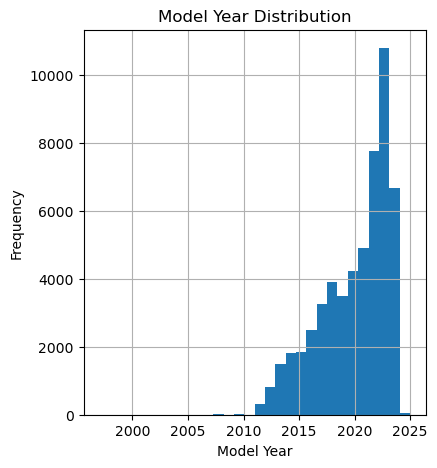

In [15]:
# histograms for numerical features
plt.figure(figsize=(15, 5))

# Model Year
plt.subplot(1, 3, 1)
vehicle_df['Model Year'].hist(bins=30)
plt.title('Model Year Distribution')
plt.xlabel('Model Year')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

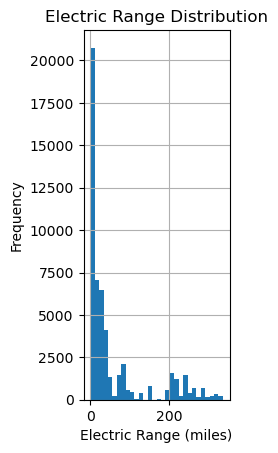

In [16]:
# Electric Range
plt.subplot(1, 3, 2)
vehicle_df['Electric Range'].hist(bins=30)
plt.title('Electric Range Distribution')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

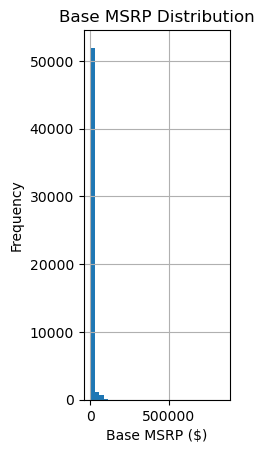

In [17]:
# Base MSRP
plt.subplot(1, 3, 3)
vehicle_df['Base MSRP'].hist(bins=30)
plt.title('Base MSRP Distribution')
plt.xlabel('Base MSRP ($)')
plt.ylabel('Frequency')


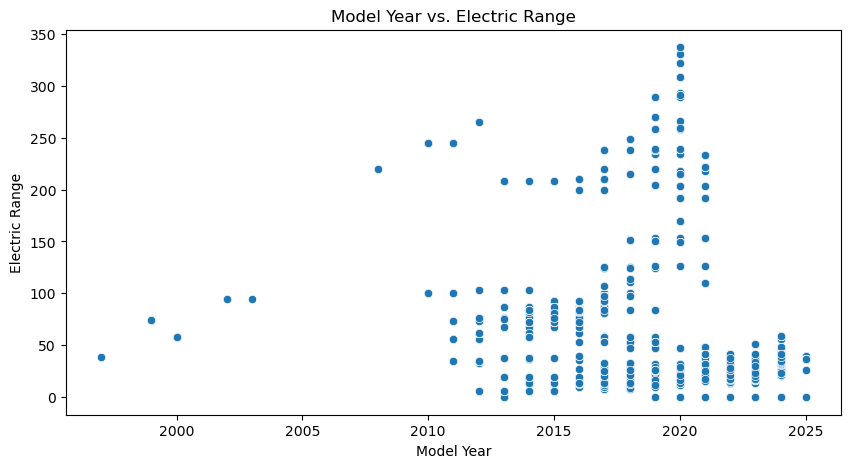

In [18]:
# relation between Model year and electric range

plt.figure(figsize=(10, 5))
sns.scatterplot(data=vehicle_df, x='Model Year', y='Electric Range')
plt.title('Model Year vs. Electric Range')
plt.xlabel('Model Year')
plt.ylabel('Electric Range')
plt.show()



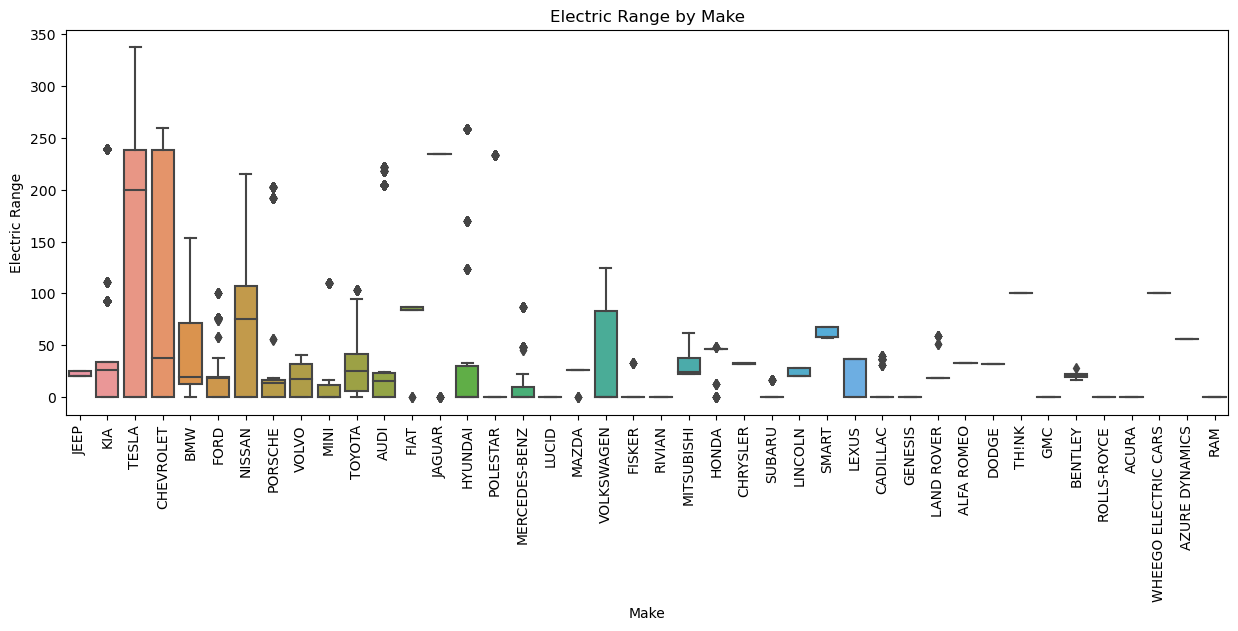

In [19]:
# Electric Range by Make

plt.figure(figsize=(15, 5))
sns.boxplot(data=vehicle_df, x='Make', y='Electric Range')
plt.title('Electric Range by Make')
plt.xlabel('Make')
plt.ylabel('Electric Range')
plt.xticks(rotation=90)
plt.show()

In [20]:
# correlation matrix

In [21]:

# selecting only the numeric columns
numeric_columns = vehicle_df.select_dtypes(include=[float, int]).columns

# correlation matrix 
correlation_matrix = vehicle_df[numeric_columns].corr()

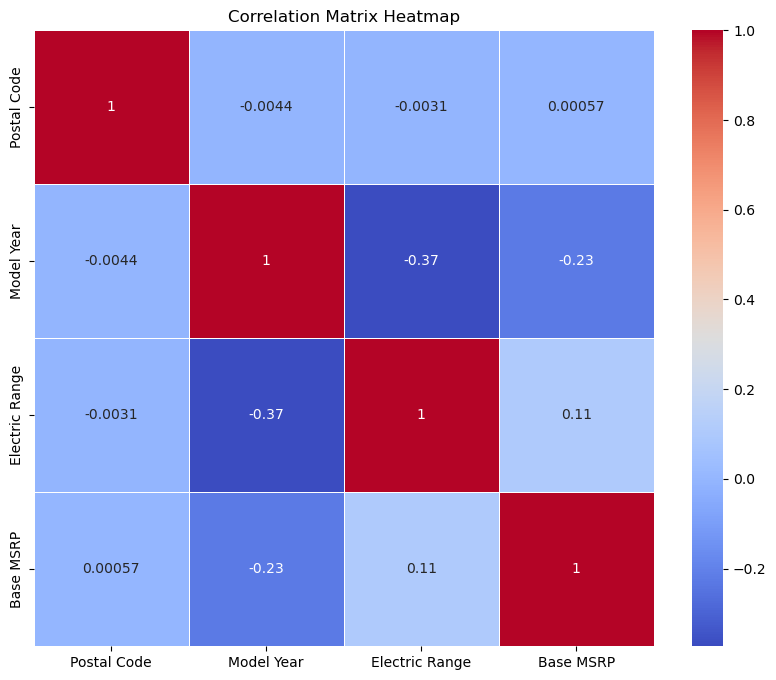

In [22]:
# heatmap of correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#  Categorical Analysis

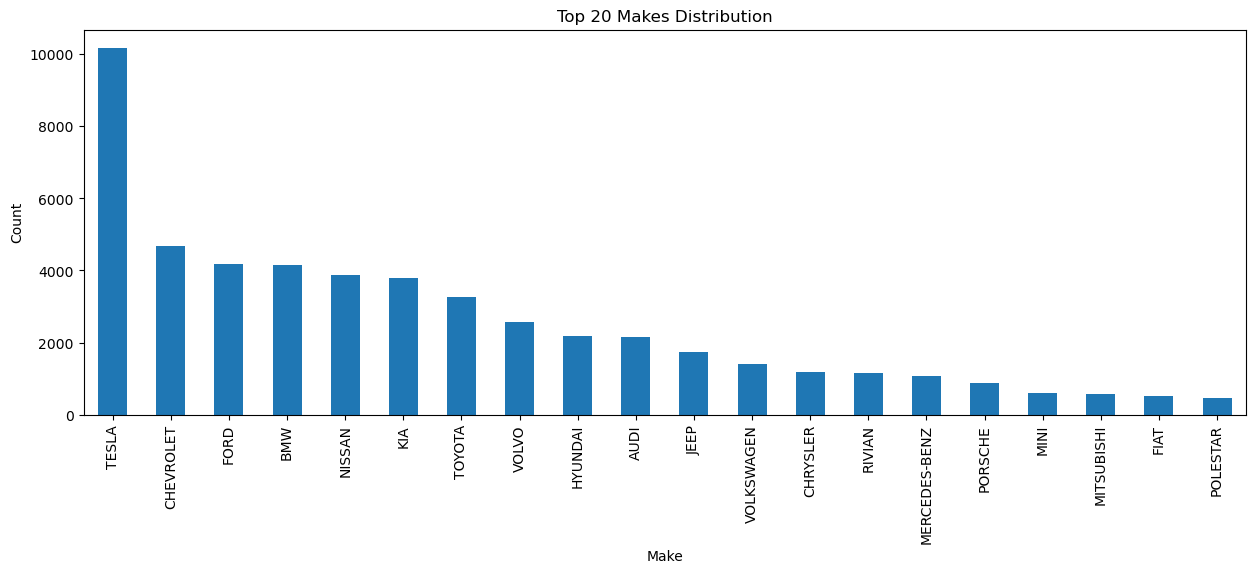

In [23]:
# Making barplot
plt.figure(figsize=(15, 5))
vehicle_df['Make'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Makes Distribution')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

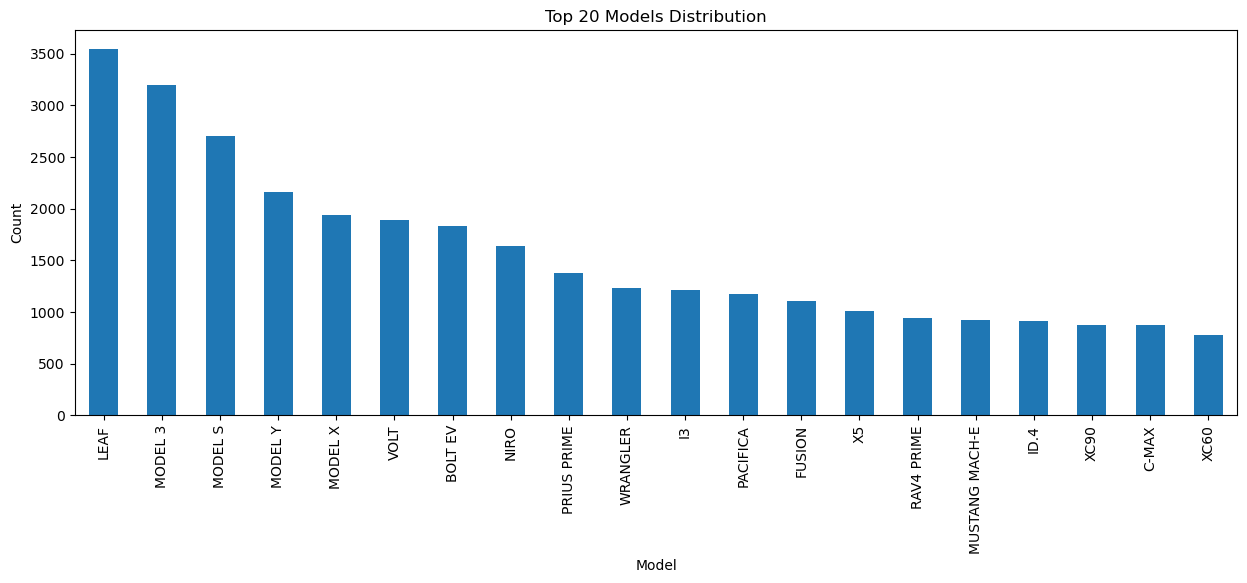

In [24]:
# Model barplot
plt.figure(figsize=(15, 5))
vehicle_df['Model'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Models Distribution')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

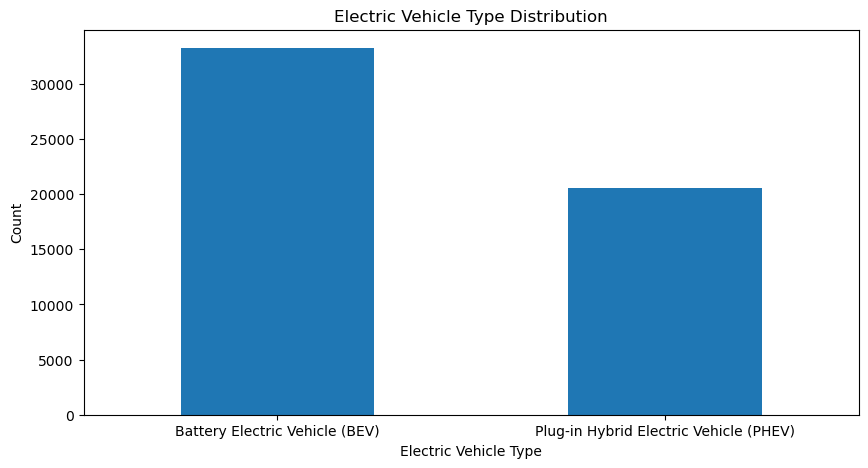

In [25]:
# electric vehicle Type 

plt.figure(figsize=(10, 5))
vehicle_df['Electric Vehicle Type'].value_counts().plot(kind='bar')
plt.title('Electric Vehicle Type Distribution')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Feature Engineering

In [26]:
# encoding the categorical variables..we used one-hot encoding method
vehicle_df_encoded = pd.get_dummies(vehicle_df, columns=['County', 'City', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'], drop_first=True)

In [27]:

print(vehicle_df_encoded.head())

   Postal Code  Model Year  Electric Range  Base MSRP  County_Adams  \
0      98204.0        2024            21.0        0.0         False   
1      98058.0        2016            93.0    31950.0         False   
2      98125.0        2020           266.0        0.0         False   
3      98367.0        2017            53.0        0.0         False   
4      98272.0        2023            30.0        0.0         False   

   County_Alameda  County_Albemarle  County_Alexandria  County_Allegheny  \
0           False             False              False             False   
1           False             False              False             False   
2           False             False              False             False   
3           False             False              False             False   
4           False             False              False             False   

   County_Allen  ...  Model_X3  Model_X5  Model_XC40  Model_XC60  Model_XC90  \
0         False  ...     False     F

#  Model Development

In [28]:
# 'Electric range' directly relates to the vehicle's adoption potential.SOo we took it as target variable.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [30]:
target_var= 'Electric Range'

In [31]:
# spliting the dataset

X = vehicle_df_encoded.drop(columns=[target_var])
y = vehicle_df_encoded[target_var]

In [32]:
# train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
##  building model using XGBoost

In [34]:
!pip install xgboost


In [35]:
from xgboost import XGBRegressor

# training XGBoost model
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb.fit(X_train, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [36]:

# prediction on test set
y_pred_xgb = xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

In [37]:
print(f"XGBoost - MSE: {mse_xgb}, MAE: {mae_xgb}, R2: {r2_xgb}")

XGBoost - MSE: 93.00954433135284, MAE: 5.200757823339796, R2: 0.9872269869488937


#  Feature Importance Analysis

In [39]:
# feature importances from Random Forest
importances = xgb.feature_importances_


In [40]:
indices = np.argsort(importances)[::-1]
 
#top 20 features
top_n = 20
top_indices = indices[:top_n]


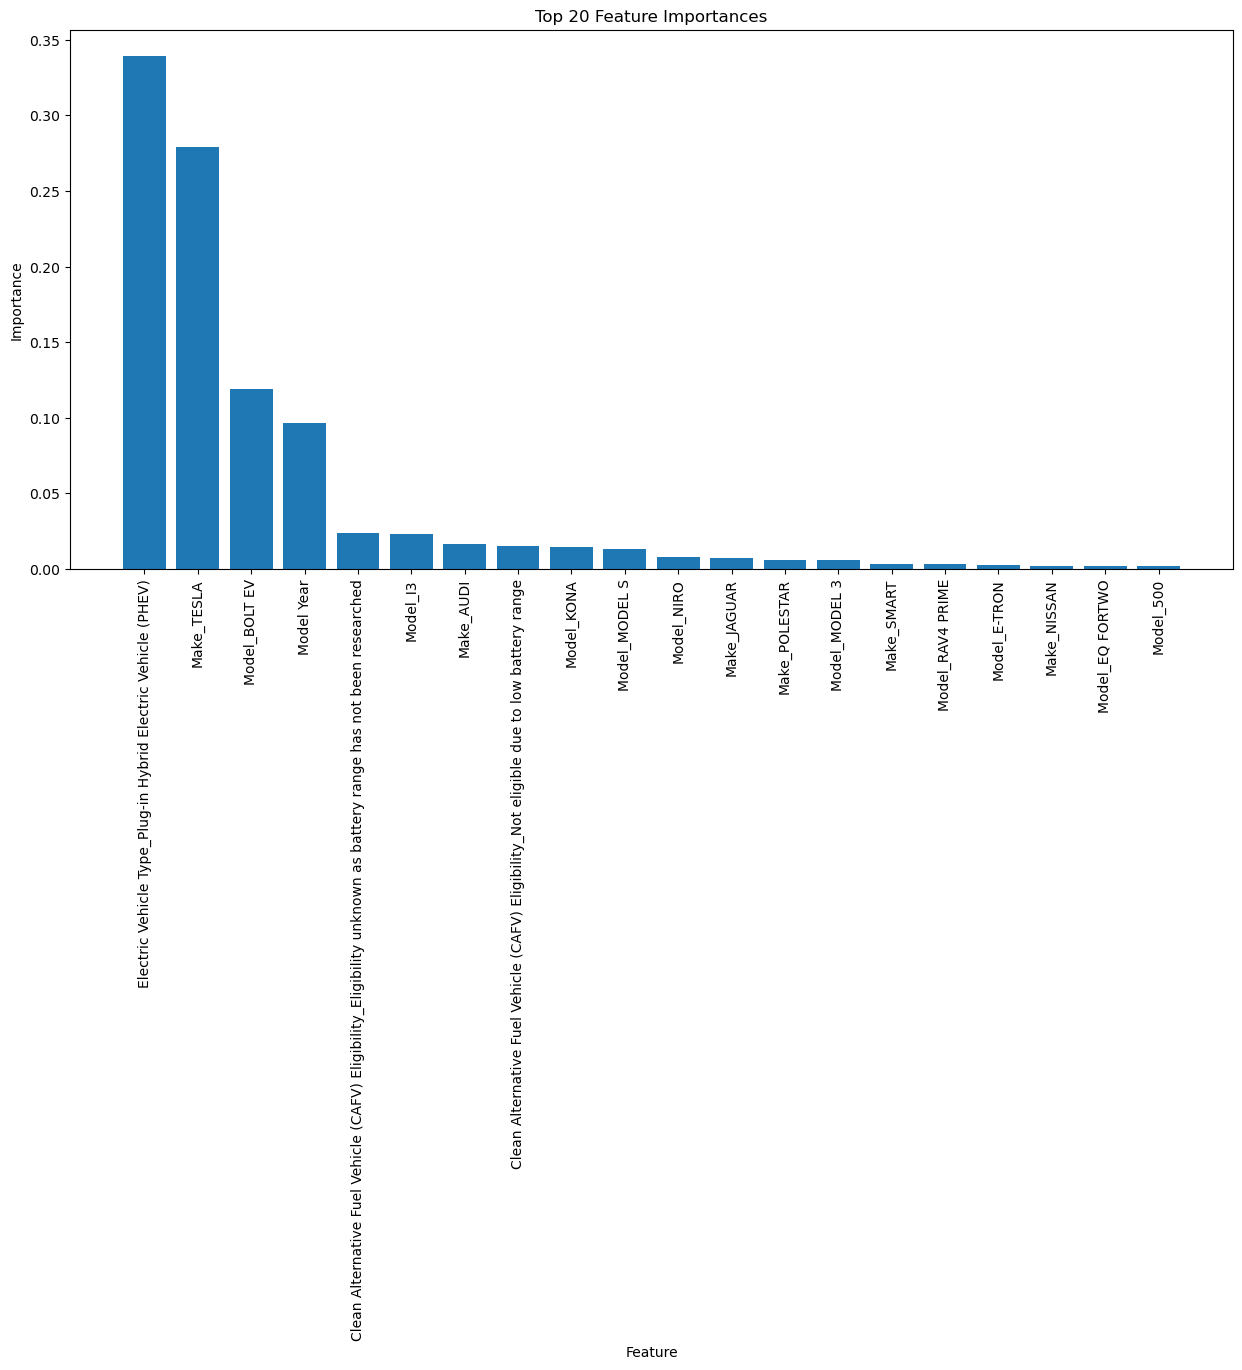

In [41]:
# visualizing feature importances
plt.figure(figsize=(15, 7))
plt.title("Top 20 Feature Importances")
plt.bar(range(top_n), importances[top_indices], align='center')
plt.xticks(range(top_n), [X.columns[i] for i in top_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

# Residual Analysis

In [44]:
# finding residuals
residuals = y_test - y_pred_xgb


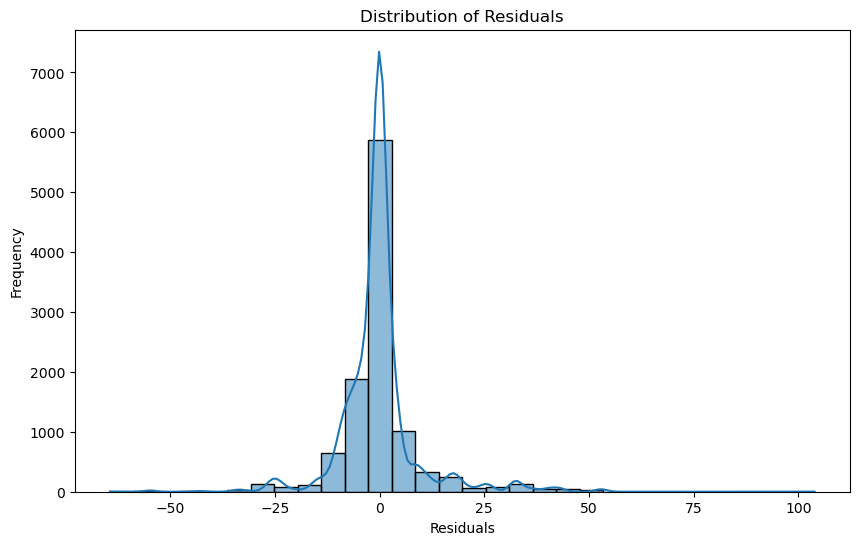

In [45]:
# residuals

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

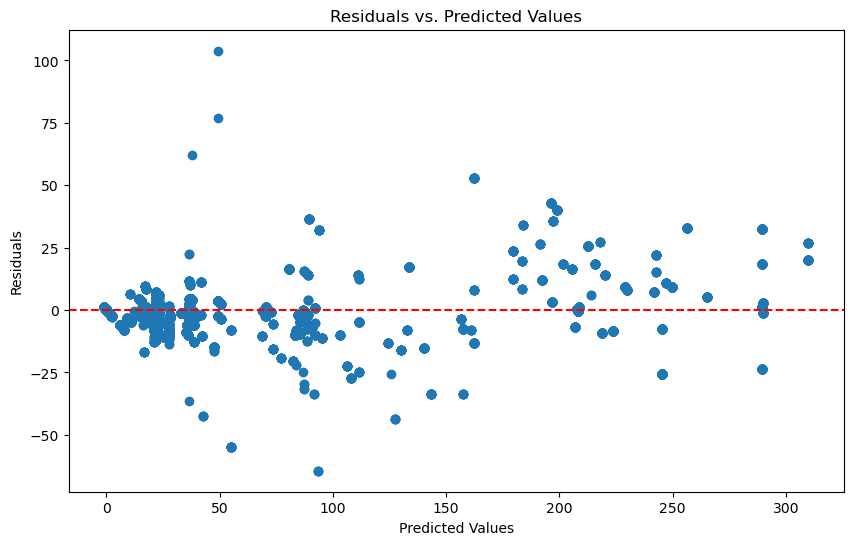

In [47]:
# residuals vs. predicted values  

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_xgb, residuals)
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Loading the next dataset

In [48]:
# EV sales dataset

global_dataset_path = 'IEA-EV-dataEV salesHistoricalCars.csv'
EV_df = pd.read_csv(global_dataset_path)

In [49]:

print(EV_df.head())


      region    category       parameter  mode powertrain  year      unit  \
0  Australia  Historical  EV sales share  Cars         EV  2011   percent   
1  Australia  Historical  EV stock share  Cars         EV  2011   percent   
2  Australia  Historical        EV sales  Cars        BEV  2011  Vehicles   
3  Australia  Historical        EV stock  Cars        BEV  2011  Vehicles   
4  Australia  Historical        EV stock  Cars        BEV  2012  Vehicles   

       value  
0    0.00650  
1    0.00039  
2   49.00000  
3   49.00000  
4  220.00000  


In [50]:
#  data types
data_types = EV_df.dtypes
print("\nData Types:")
print(data_types)


Data Types:
region         object
category       object
parameter      object
mode           object
powertrain     object
year            int64
unit           object
value         float64
dtype: object


In [51]:
# count of different parameters

parameter_counts = EV_df['parameter'].value_counts()
print("\nParameter Counts:")
print(parameter_counts)


Parameter Counts:
parameter
EV sales                         1342
EV stock                         1145
EV sales share                    603
EV stock share                    465
Oil displacement Mbd               84
Oil displacement, million lge      84
Electricity demand                 75
Name: count, dtype: int64


# Data Cleaning

In [52]:
# Filter the dataset for EV sales, Cars, and unit as Vehicles
filtered_df = EV_df[(EV_df['parameter'] == 'EV sales') & 
                        (EV_df['mode'] == 'Cars') & 
                        (EV_df['unit'] == 'Vehicles')]

In [53]:
# Convert the year column to datetime and set it as the index
filtered_df['year'] = pd.to_datetime(filtered_df['year'], format='%Y')
filtered_df.set_index('year', inplace=True)

C:\Users\tenyj\AppData\Local\Temp\ipykernel_48400\3217081786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = pd.to_datetime(filtered_df['year'], format='%Y')


In [54]:
# removing duplicates

filtered_df = filtered_df[~filtered_df.index.duplicated(keep='first')]

In [55]:

print(filtered_df.head())
print(filtered_df.columns)

               region    category parameter  mode powertrain      unit   value
year                                                                          
2011-01-01  Australia  Historical  EV sales  Cars        BEV  Vehicles    49.0
2012-01-01  Australia  Historical  EV sales  Cars        BEV  Vehicles   170.0
2013-01-01  Australia  Historical  EV sales  Cars       PHEV  Vehicles   100.0
2014-01-01  Australia  Historical  EV sales  Cars        BEV  Vehicles   370.0
2015-01-01  Australia  Historical  EV sales  Cars       PHEV  Vehicles  1000.0
Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'unit',
       'value'],
      dtype='object')


In [56]:
#  duplicates

duplicates = filtered_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [57]:
#  missing values

missing_values = filtered_df.isnull().sum()
print(f"Missing values:\n{missing_values}")

Missing values:
region        0
category      0
parameter     0
mode          0
powertrain    0
unit          0
value         0
dtype: int64


In [58]:

print(filtered_df.dtypes)

region         object
category       object
parameter      object
mode           object
powertrain     object
unit           object
value         float64
dtype: object


# Visualizations

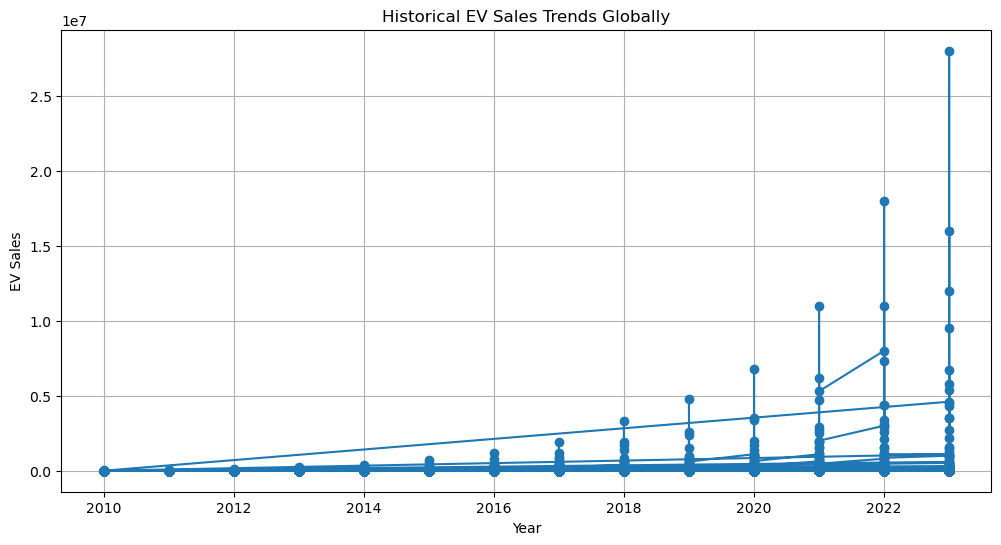

In [59]:
#  EV sales trends

plt.figure(figsize=(12, 6))
plt.plot(EV_df['year'], EV_df['value'], marker='o')
plt.xlabel('Year')
plt.ylabel('EV Sales')
plt.title('Historical EV Sales Trends Globally')
plt.grid(True)
plt.show()


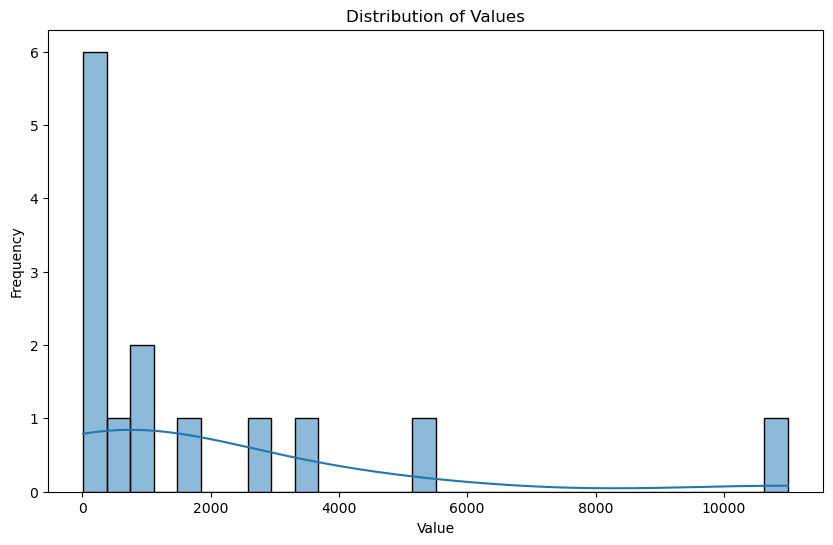

In [60]:
# Visualize distribution of values
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['value'], bins=30, kde=True)
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [61]:
# top 10 regions
top_regions = EV_df['region'].value_counts().index[:10]

In [62]:

filtered_ev_sales_share =EV_df[(EV_df['parameter'] == 'EV sales share') & (EV_df['region'].isin(top_regions))]
filtered_ev_stock_share =EV_df[(EV_df['parameter'] == 'EV stock share') & (EV_df['region'].isin(top_regions))]

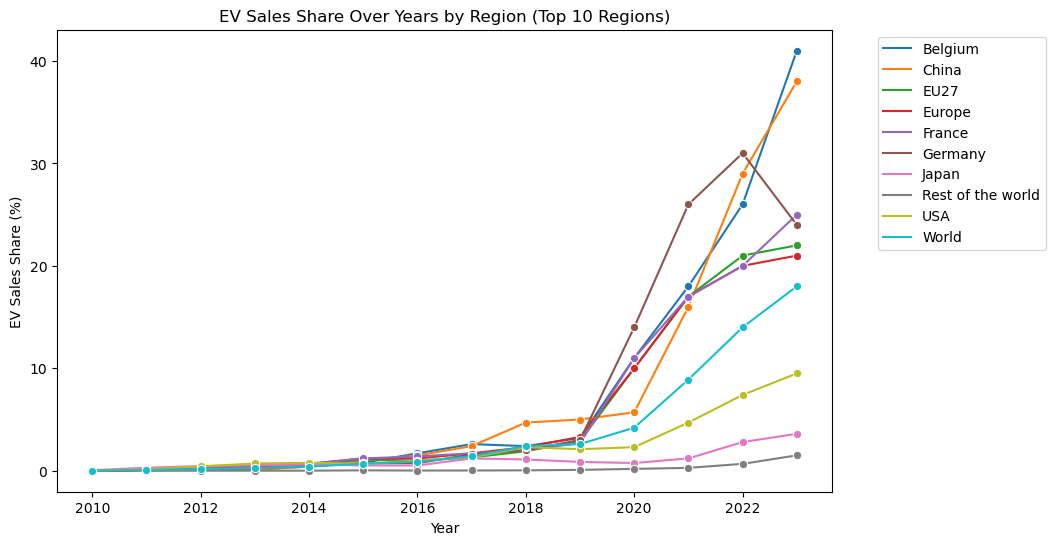

In [63]:
# EV sales share over years
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_ev_sales_share, x='year', y='value', hue='region', marker='o')
plt.title('EV Sales Share Over Years by Region (Top 10 Regions)')
plt.xlabel('Year')
plt.ylabel('EV Sales Share (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

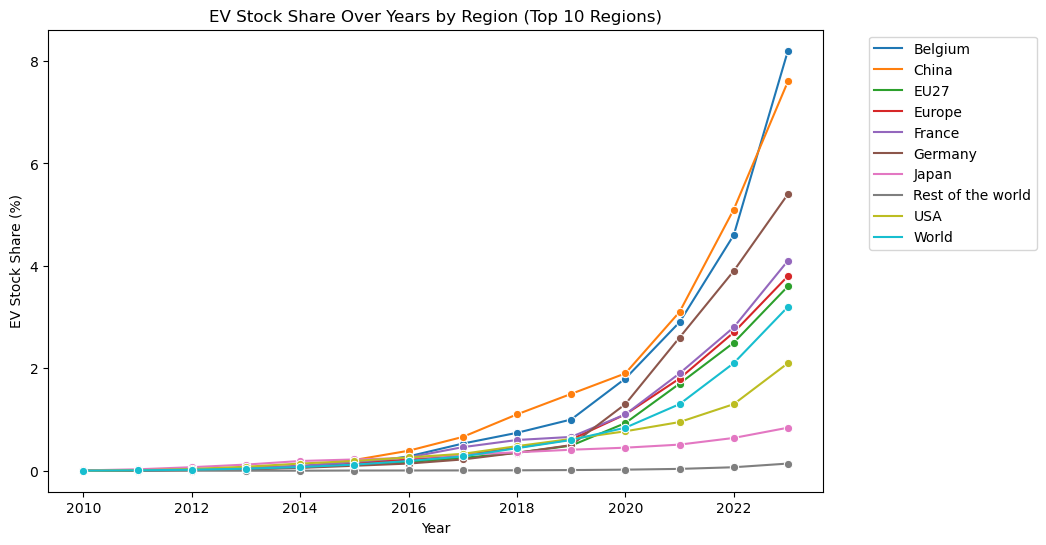

In [64]:
# EV stock share 
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_ev_stock_share, x='year', y='value', hue='region', marker='o')
plt.title('EV Stock Share Over Years by Region (Top 10 Regions)')
plt.xlabel('Year')
plt.ylabel('EV Stock Share (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [65]:

filtered_df = filtered_df.dropna()

In [66]:
print(filtered_df.head())

               region    category parameter  mode powertrain      unit   value
year                                                                          
2011-01-01  Australia  Historical  EV sales  Cars        BEV  Vehicles    49.0
2012-01-01  Australia  Historical  EV sales  Cars        BEV  Vehicles   170.0
2013-01-01  Australia  Historical  EV sales  Cars       PHEV  Vehicles   100.0
2014-01-01  Australia  Historical  EV sales  Cars        BEV  Vehicles   370.0
2015-01-01  Australia  Historical  EV sales  Cars       PHEV  Vehicles  1000.0


In [67]:
!pip install prophet


16:30:28 - cmdstanpy - INFO - Chain [1] start processing
16:30:28 - cmdstanpy - INFO - Chain [1] done processing


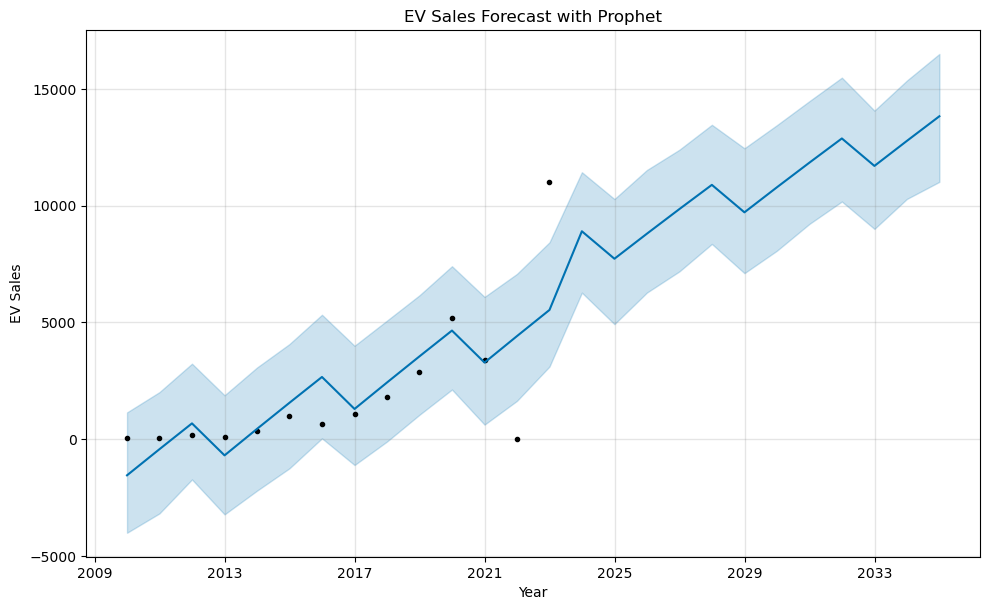

In [68]:
from prophet import Prophet

# Prepare the data for Prophet
prophet_df = filtered_df.reset_index()[['year', 'value']]
prophet_df.columns = ['ds', 'y']




In [ ]:
# fitting the model
model = Prophet()
model.fit(prophet_df)

In [ ]:

future = model.make_future_dataframe(periods=12, freq='Y')

In [ ]:
# Forecast
forecast = model.predict(future)

In [ ]:
fig = model.plot(forecast)
plt.title('EV Sales Forecast with Prophet')
plt.xlabel('Year')
plt.ylabel('EV Sales')
plt.show()

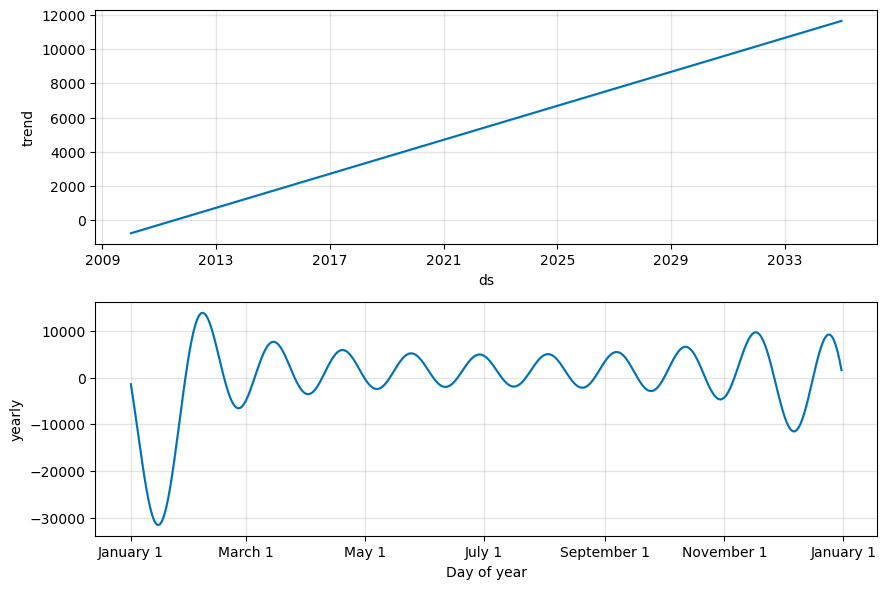

In [69]:
# plotting forecast components
fig2 = model.plot_components(forecast)
plt.show()


In [70]:
from prophet.diagnostics import cross_validation, performance_metrics

initial = '1095 days'  
period = '180 days'    
horizon = '365 days'   

# cross-validation
df_cv = cross_validation(model, initial=initial, period=period, horizon=horizon)

df_p = performance_metrics(df_cv)
print(df_p.head())


  0%|          | 0/19 [00:00<?, ?it/s]

16:30:35 - cmdstanpy - INFO - Chain [1] start processing
16:30:35 - cmdstanpy - INFO - Chain [1] done processing
16:30:35 - cmdstanpy - INFO - Chain [1] start processing
16:30:35 - cmdstanpy - INFO - Chain [1] done processing
16:30:35 - cmdstanpy - INFO - Chain [1] start processing
16:30:36 - cmdstanpy - INFO - Chain [1] done processing
16:30:36 - cmdstanpy - INFO - Chain [1] start processing
16:30:36 - cmdstanpy - INFO - Chain [1] done processing
16:30:36 - cmdstanpy - INFO - Chain [1] start processing
16:30:36 - cmdstanpy - INFO - Chain [1] done processing
16:30:36 - cmdstanpy - INFO - Chain [1] start processing
16:30:36 - cmdstanpy - INFO - Chain [1] done processing
16:30:36 - cmdstanpy - INFO - Chain [1] start processing
16:30:36 - cmdstanpy - INFO - Chain [1] done processing
16:30:37 - cmdstanpy - INFO - Chain [1] start processing
16:30:37 - cmdstanpy - INFO - Chain [1] done processing
16:30:37 - cmdstanpy - INFO - Chain [1] start processing
16:30:37 - cmdstanpy - INFO - Chain [1]

   horizon            mse        rmse         mae      mape     mdape  \
0 138 days   43943.611485  209.627316  209.627316  0.566560  0.566560   
1 143 days  372527.282182  610.350131  610.350131  0.610350  0.610350   
2 148 days  105466.985707  324.756810  324.756810  0.484712  0.484712   
3 154 days   94071.690061  306.711086  306.711086  0.278828  0.278828   
4 159 days  426243.853451  652.873536  652.873536  0.362708  0.362708   

      smape  coverage  
0  0.790491       0.0  
1  0.878423       0.0  
2  0.390155       0.0  
3  0.323998       0.0  
4  0.443058       0.0  


In [71]:

model = Prophet(
    seasonality_mode='multiplicative',  
    changepoint_prior_scale=0.05,       
    seasonality_prior_scale=10.0        
)

# Fit the model
model.fit(prophet_df)


df_cv = cross_validation(model, initial='1095 days', period='180 days', horizon='365 days')
df_p = performance_metrics(df_cv)
print(df_p.head())


16:30:43 - cmdstanpy - INFO - Chain [1] start processing
16:30:43 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/19 [00:00<?, ?it/s]

16:30:43 - cmdstanpy - INFO - Chain [1] start processing
16:30:43 - cmdstanpy - INFO - Chain [1] done processing
16:30:43 - cmdstanpy - INFO - Chain [1] start processing
16:30:43 - cmdstanpy - INFO - Chain [1] done processing
16:30:43 - cmdstanpy - INFO - Chain [1] start processing
16:30:43 - cmdstanpy - INFO - Chain [1] done processing
16:30:43 - cmdstanpy - INFO - Chain [1] start processing
16:30:44 - cmdstanpy - INFO - Chain [1] done processing
16:30:44 - cmdstanpy - INFO - Chain [1] start processing
16:30:44 - cmdstanpy - INFO - Chain [1] done processing
16:30:44 - cmdstanpy - INFO - Chain [1] start processing
16:30:44 - cmdstanpy - INFO - Chain [1] done processing
16:30:44 - cmdstanpy - INFO - Chain [1] start processing
16:30:44 - cmdstanpy - INFO - Chain [1] done processing
16:30:44 - cmdstanpy - INFO - Chain [1] start processing
16:30:44 - cmdstanpy - INFO - Chain [1] done processing
16:30:44 - cmdstanpy - INFO - Chain [1] start processing
16:30:45 - cmdstanpy - INFO - Chain [1]

   horizon            mse        rmse         mae      mape     mdape  \
0 138 days   38616.092062  196.509776  196.509776  0.531108  0.531108   
1 143 days  280526.074251  529.647122  529.647122  0.529647  0.529647   
2 148 days  840224.496145  916.637603  916.637603  1.368116  1.368116   
3 154 days  176029.961428  419.559247  419.559247  0.381417  0.381417   
4 159 days  420093.660779  648.146327  648.146327  0.360081  0.360081   

      smape  coverage  
0  0.723140       0.0  
1  0.720435       0.0  
2  0.812392       0.0  
3  0.471298       0.0  
4  0.439145       0.0  


In [72]:
# Prophet model evaluation

In [73]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,138 days,38616.092062,196.509776,196.509776,0.531108,0.531108,0.723140,0.0
1,143 days,280526.074251,529.647122,529.647122,0.529647,0.529647,0.720435,0.0
2,148 days,840224.496145,916.637603,916.637603,1.368116,1.368116,0.812392,0.0
3,154 days,176029.961428,419.559247,419.559247,0.381417,0.381417,0.471298,0.0
4,159 days,420093.660779,648.146327,648.146327,0.360081,0.360081,0.439145,0.0


In [75]:
# Display performance metrics
from prophet.diagnostics import cross_validation, performance_metrics

print(df_p[['horizon', 'mse', 'rmse', 'mae', 'mape', 'coverage']])


    horizon           mse         rmse          mae        mape  coverage
0  138 days  3.861609e+04   196.509776   196.509776    0.531108       0.0
1  143 days  2.805261e+05   529.647122   529.647122    0.529647       0.0
2  148 days  8.402245e+05   916.637603   916.637603    1.368116       0.0
3  154 days  1.760300e+05   419.559247   419.559247    0.381417       0.0
4  159 days  4.200937e+05   648.146327   648.146327    0.360081       0.0
5  164 days  1.859608e+06  1363.674277  1363.674277    0.470233       0.0
6  169 days  6.416664e+06  2533.113525  2533.113525    0.487137       0.0
7  175 days  3.550003e+06  1884.145091  1884.145091    0.554160       0.0
8  180 days  1.351192e+07  3675.855831  3675.855831  245.057055       0.0
9  318 days  3.861609e+04   196.509776   196.509776    0.531108       0.0
10 323 days  2.805261e+05   529.647122   529.647122    0.529647       0.0
11 328 days  8.402245e+05   916.637603   916.637603    1.368116       0.0
12 334 days  1.760300e+05   419.559247